In [73]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [74]:
def fnr(detections, threshold):
    n = len(detections)
    count = 0
    # print("Threshold: ", threshold)
    for x in detections:
        if x < threshold:
            count += 1

    return ((count / n) * 100)

def fpr(detections, threshold):
    n = len(detections)
    count = 0
    for x in detections:
        if x > threshold:
            count += 1
    
    return ((count / n) * 100)

In [75]:
def preprocess(detections):
  n = len(detections)
  threshold = np.mean(detections) + 3 * np.std(detections)
  print(f"Size = {n}, Max = {np.max(detections)}, Min = {np.min(detections)}, Mean = {np.mean(detections): 10.8f}, STD = {np.std(detections): 10.8f}, D = {np.mean(detections) + 3 * np.std(detections): 10.8f}")
  

  index = np.zeros(n)
  results = np.zeros(n)

  for i, result in enumerate(detections):
    index[i] = i + 1
    results[i] = result
  
  index /= n
  results *= 10000

  return index, results, threshold

In [76]:
def plot_cdf_adversarial_audio(original_detections, adversarial_detections, attack_name):
  original_index, original_results, threshold = preprocess(original_detections)
  plt.plot(original_results, original_index, "k--", label="Spk10_test")

  i = 0
  colors = ["red", "blue", "green", "black", "yellow", "lime", "pink", "gold", "olive", "skyblue", "thistle"]
  for x in adversarial_detections:
    temp_index, temp_results, _ = preprocess(adversarial_detections[x])
    plt.plot(temp_results, temp_index, colors[i], label=f"{x}")
    i = (i + 1) % len(colors)
    print("------------------------------------------")
    print(f"FNR for {x}:", fnr(adversarial_detections[x], threshold))
    print("------------------------------------------")

  # adversarial_index, adversarial_results = preprocess(adversarial_detections)

  # plt.plot(adversarial_results, adversarial_index, "r-", label=f"{attack_name}")

  plt.xlabel(r'Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$', fontsize=12)
  plt.ylabel('CDF', fontsize=12)
  plt.title(attack_name)
  plt.tick_params(axis='both', labelsize=12)
  plt.legend()
  plt.tight_layout()
  plt.savefig(f"./plots/{x}.png")
  plt.show()

  if not os.path.exists("./plots"):
    os.makedirs("./plots")
  
  




In [77]:
# Original Audios
original_files = os.listdir(os.path.join("output", "original"))

original_data = {}
combined_data = []
for x in original_files:
  with open(f"output/original/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    original_data[x.split(".pickle")[0]] = temp
    combined_data.extend(temp)

combined_data.sort()


Size = 100, Max = 0.0002627831418067217, Min = 0.0, Mean =  0.00002505, STD =  0.00004500, D =  0.00016006
Size = 1000, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00010320, STD =  0.00025536, D =  0.00086927
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
FPR for Spk10_test: 2.8000000000000003


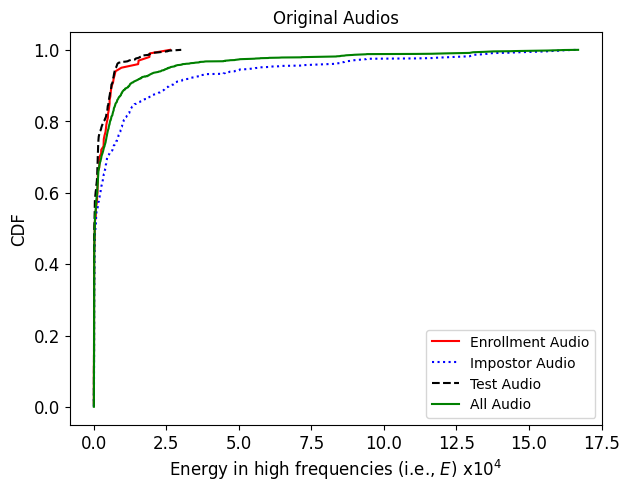

In [88]:
# Plot CDF of original data
enroll_index, enroll_results, enroll_threshold = preprocess(original_data['spk10enroll'])
impostor_index, impostor_results, impostor_threshold = preprocess(original_data['spk10impostor'])
test_index, test_results, test_threshold = preprocess(original_data['spk10test'])
all_index, all_results, all_threshold = preprocess(combined_data)

print("FPR for Spk10_test:", fpr(original_data["spk10test"], test_threshold))

plt.plot(enroll_results, enroll_index, "r-", label="Enrollment Audio")
plt.plot(impostor_results, impostor_index, "b:", label="Impostor Audio")
plt.plot(test_results, test_index, "k--", label="Test Audio")
plt.plot(all_results, all_index, "g", label="All Audio")

plt.xlabel(r"Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.tick_params(axis="both", labelsize=12)
plt.legend()
plt.tight_layout()
plt.title("Original Audios")
plt.savefig("plots/original_audios.png")
plt.show()

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.008970528841018677, Min = 1.2257810340088326e-05, Mean =  0.00479739, STD =  0.00129313, D =  0.00867679
------------------------------------------
FNR for fakebob_0.002_0.0_50_200_20: 0.2
------------------------------------------
Size = 1000, Max = 0.009658723138272762, Min = 1.2257810340088326e-05, Mean =  0.00473269, STD =  0.00130069, D =  0.00863476
------------------------------------------
FNR for fakebob_0.002_0.5_50_1000_100: 0.2
------------------------------------------
Size = 5, Max = 0.0038380601909011602, Min = 0.002330099930986762, Mean =  0.00298108, STD =  0.00059701, D =  0.00477212
------------------------------------------
FNR for fakebob_0.002_0.5_50_2000_20: 0.0
------------------------------------------
Size = 1000, Max = 0.008928588591516018, Min = 1.2257810340088326e-05, Mean =  0.00475326, STD =  0.00127862, D =  0.00858913
-------

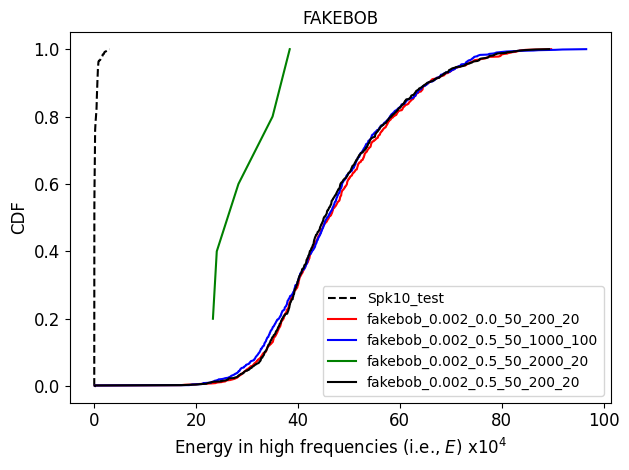

In [89]:
# FAKEBOB Attack
fakebob_files = os.listdir("output/fakebob")
fakebob_data = {}
for x in fakebob_files:
  with open(f"output/fakebob/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    fakebob_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["spk10test"], fakebob_data, "FAKEBOB")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.00031944733927957714, Min = 1.3993427216973942e-07, Mean =  0.00002828, STD =  0.00004101, D =  0.00015130
------------------------------------------
FNR for cw2_0.5_1000_100: 96.89999999999999
------------------------------------------
Size = 1000, Max = 0.0003099789028055966, Min = 1.4205781440068677e-07, Mean =  0.00002675, STD =  0.00003876, D =  0.00014302
------------------------------------------
FNR for cw2_0_1000_100: 96.8
------------------------------------------
Size = 1000, Max = 0.0009882887825369835, Min = 2.1808716610394185e-07, Mean =  0.00005208, STD =  0.00007591, D =  0.00027980
------------------------------------------
FNR for cw2_10_1000_100: 91.2
------------------------------------------
Size = 1000, Max = 0.0022086910903453827, Min = 6.520471629301028e-07, Mean =  0.00011531, STD =  0.00016535, D =  0.00061134
----------------------

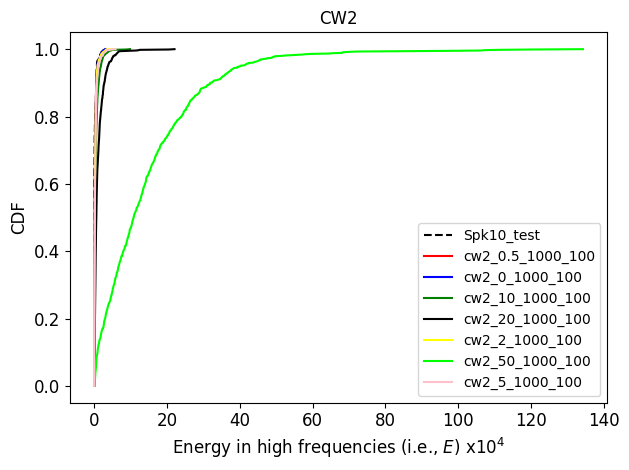

In [79]:
# CW2 Attack
cw2_files = os.listdir("output/cw2")
cw2_data = {}
for x in cw2_files:
  with open(f"output/cw2/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    cw2_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["spk10test"], cw2_data, "CW2")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.0024154731072485447, Min = 0.00039327898412011564, Mean =  0.00110732, STD =  0.00028130, D =  0.00195121
------------------------------------------
FNR for cwinf_100_0.002: 0.0
------------------------------------------
Size = 1000, Max = 0.0020918743684887886, Min = 0.00022874436399433762, Mean =  0.00071547, STD =  0.00020623, D =  0.00133417
------------------------------------------
FNR for cwinf_10_0.002: 0.0
------------------------------------------
Size = 1000, Max = 0.0025493428111076355, Min = 0.000393372232792899, Mean =  0.00102965, STD =  0.00028024, D =  0.00187038
------------------------------------------
FNR for cwinf_30_0.002: 0.0
------------------------------------------


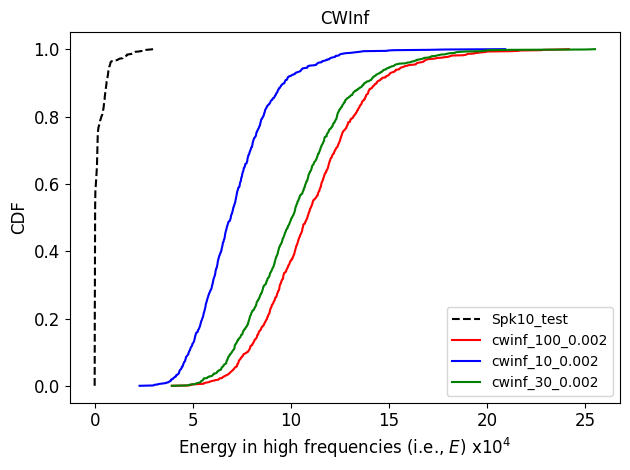

In [80]:
# CWInf
cwinf_files = os.listdir("output/cwinf")
cwinf_data = {}
for x in cwinf_files:
  with open(f"output/cwinf/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    cwinf_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["spk10test"], cwinf_data, "CWInf")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.004951938986778259, Min = 0.0001364090567221865, Mean =  0.00269106, STD =  0.00090133, D =  0.00539506
------------------------------------------
FNR for fgsm_0.002: 0.0
------------------------------------------


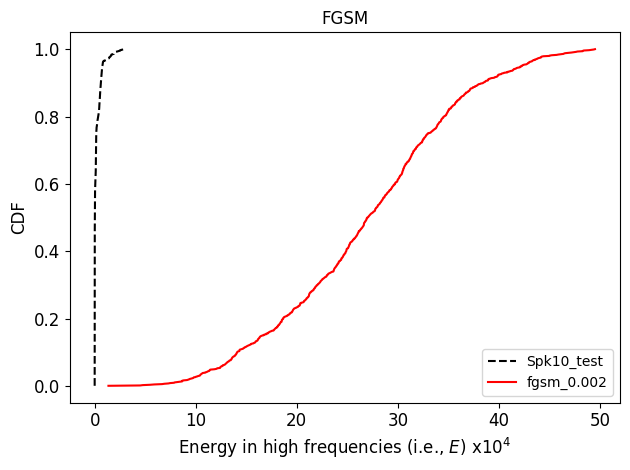

In [81]:
# FGSM
fgsm_files = os.listdir("output/fgsm")
fgsm_data = {}
for x in fgsm_files:
  with open(f"output/fgsm/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    fgsm_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["spk10test"], fgsm_data, "FGSM")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.00304584507830441, Min = 0.0004571381432469934, Mean =  0.00110062, STD =  0.00029767, D =  0.00199363
------------------------------------------
FNR for pgd_100_0.002: 0.0
------------------------------------------
Size = 1000, Max = 0.0017202269518747926, Min = 0.00028735341038554907, Mean =  0.00071975, STD =  0.00020356, D =  0.00133044
------------------------------------------
FNR for pgd_10_0.002: 0.0
------------------------------------------
Size = 1000, Max = 0.002968353684991598, Min = 0.000419503339799121, Mean =  0.00125347, STD =  0.00034787, D =  0.00229709
------------------------------------------
FNR for pgd_20_0.002: 0.0
------------------------------------------
Size = 1000, Max = 0.0033040863927453756, Min = 0.0003546853258740157, Mean =  0.00120341, STD =  0.00033413, D =  0.00220579
------------------------------------------
FNR for pg

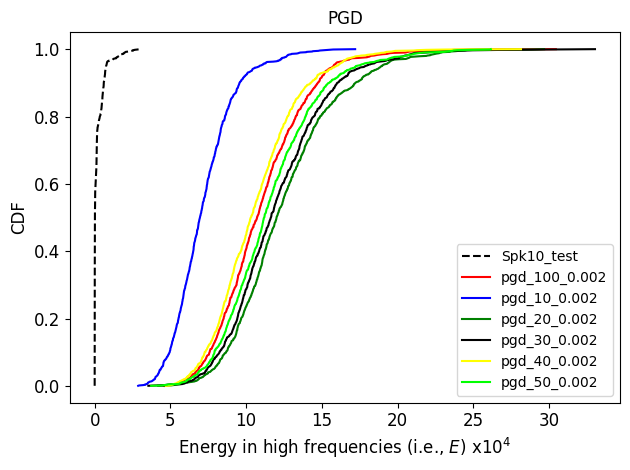

In [82]:
# PGD
pgd_files = os.listdir("output/pgd")
pgd_data = {}
for x in pgd_files:
  with open(f"output/pgd/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    pgd_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["spk10test"], pgd_data, "PGD")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 918, Max = 0.0016839917516335845, Min = 0.0, Mean =  0.00010457, STD =  0.00026467, D =  0.00089859
------------------------------------------
FNR for kenan_15: 84.0958605664488
------------------------------------------


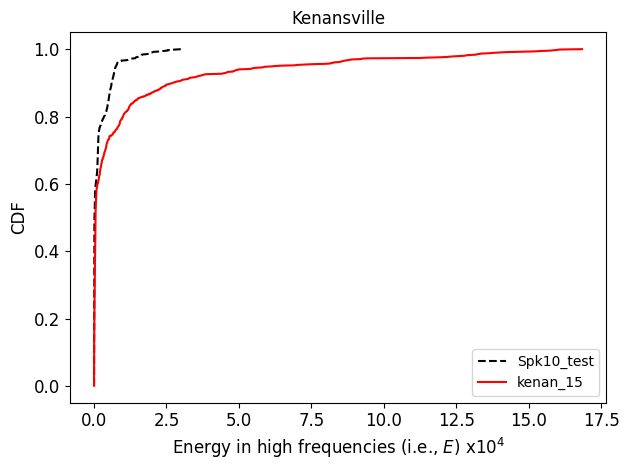

In [83]:
# Kenan
kenan_files = os.listdir("output/kenan")
kenan_data = {}
for x in kenan_files:
  with open(f"output/kenan/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    kenan_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["spk10test"], kenan_data, "Kenansville")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.00037548653199337423, Min = 0.0, Mean =  0.00002979, STD =  0.00004613, D =  0.00016819
------------------------------------------
FNR for as17_cw2_0_0-1000-100: 96.2
------------------------------------------
Size = 1000, Max = 0.00036767410347238183, Min = 0.0, Mean =  0.00003186, STD =  0.00004632, D =  0.00017081
------------------------------------------
FNR for as17_cw2_2_0-1000-100: 96.0
------------------------------------------
Size = 1000, Max = 0.009949488565325737, Min = 0.0, Mean =  0.00433920, STD =  0.00121768, D =  0.00799225
------------------------------------------
FNR for as17_fakebob_0_002-0_5-50-200-20: 0.8999999999999999
------------------------------------------
Size = 1000, Max = 0.005347067024558783, Min = 0.00013279315317049623, Mean =  0.00163872, STD =  0.00120335, D =  0.00524877
------------------------------------------
FNR fo

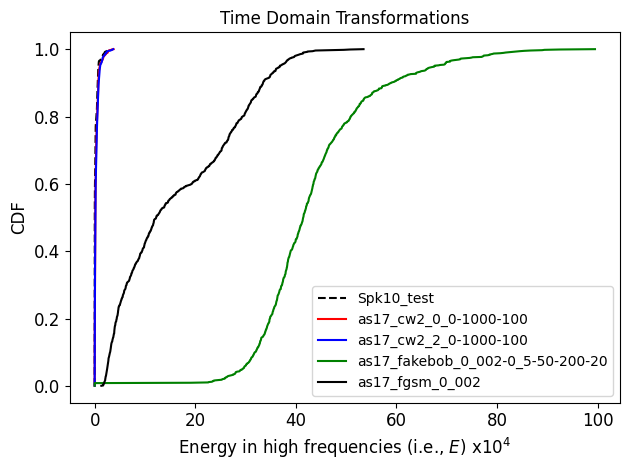

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.044614892452955246, Min = 0.0, Mean =  0.00149515, STD =  0.00340297, D =  0.01170405
------------------------------------------
FNR for at16_cw2_0_0-1000-100: 33.300000000000004
------------------------------------------
Size = 1000, Max = 0.06269855052232742, Min = 0.0, Mean =  0.00261042, STD =  0.00609749, D =  0.02090288
------------------------------------------
FNR for at16_cw2_2_0-1000-100: 24.9
------------------------------------------
Size = 1000, Max = 0.018184298649430275, Min = 0.00027122124447487295, Mean =  0.00335541, STD =  0.00192933, D =  0.00914340
------------------------------------------
FNR for at16_cw2_50_0-1000-100: 0.0
------------------------------------------
Size = 1000, Max = 0.0018412551144137979, Min = 0.0, Mean =  0.00088698, STD =  0.00032820, D =  0.00187159
------------------------------------------
FNR for at16_cwinf_30

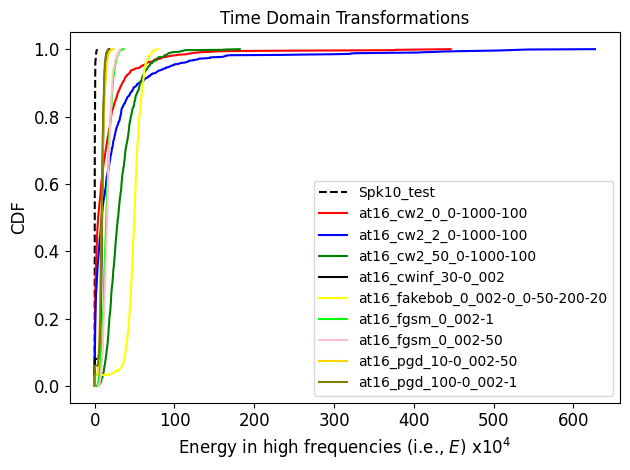

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.0003146062372252345, Min = 0.0, Mean =  0.00002858, STD =  0.00003996, D =  0.00014845
------------------------------------------
FNR for ms7_cw2_0_0-1000-100: 96.89999999999999
------------------------------------------
Size = 1000, Max = 0.0066514890640974045, Min = 0.0012000387068837881, Mean =  0.00327913, STD =  0.00088199, D =  0.00592509
------------------------------------------
FNR for ms7_cwinf_30-0_002: 0.0
------------------------------------------
Size = 1000, Max = 0.00965033657848835, Min = 0.0, Mean =  0.00525996, STD =  0.00151103, D =  0.00979305
------------------------------------------
FNR for ms7_fakebob_0_002-0_5-50-200-20: 1.7000000000000002
------------------------------------------
Size = 1000, Max = 0.006657767575234175, Min = 0.001054922235198319, Mean =  0.00400002, STD =  0.00092764, D =  0.00678295
-----------------------------

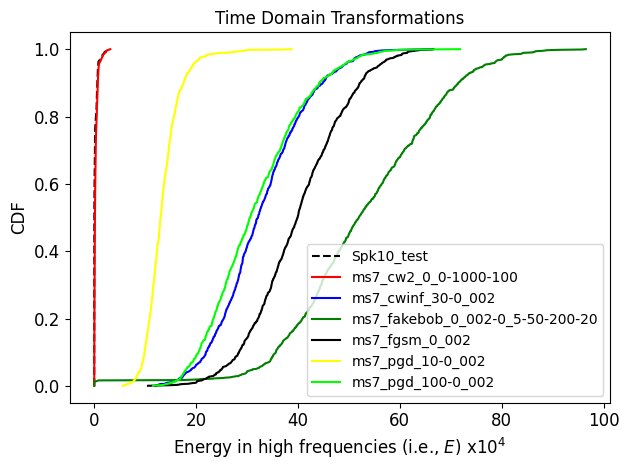

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.007888201624155045, Min = 7.919874889239509e-08, Mean =  0.00024508, STD =  0.00051369, D =  0.00178615
------------------------------------------
FNR for qt7_cw2_0_0-1000-100: 57.99999999999999
------------------------------------------
Size = 1000, Max = 0.010190831497311592, Min = 7.919874889239509e-08, Mean =  0.00034480, STD =  0.00064616, D =  0.00228328
------------------------------------------
FNR for qt7_cw2_2_0-1000-100: 47.5
------------------------------------------
Size = 1000, Max = 0.012728344649076462, Min = 0.00010436121374368668, Mean =  0.00278928, STD =  0.00160857, D =  0.00761501
------------------------------------------
FNR for qt7_cw2_50_0-1000-100: 0.1
------------------------------------------
Size = 1000, Max = 0.0024951444938778877, Min = 0.0002618285652715713, Mean =  0.00114433, STD =  0.00034844, D =  0.00218964
-------------

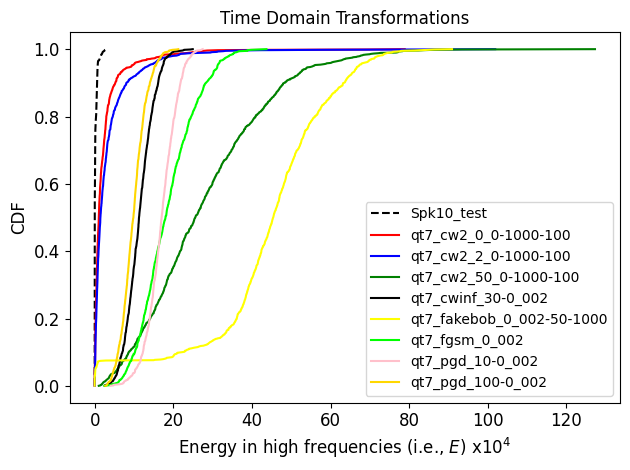

In [84]:
# Defense - Time Domain
time_d_files = os.listdir("output/defense/time")
try:
  time_d_files.remove(".ipynb_checkpoints")
except:
  pass
for f in time_d_files:
  files = os.listdir(f"output/defense/time/{f}")
  time_d_data = {}
  for x in files:
    with open(f"output/defense/time/{f}/{x}", "br") as f1:
      temp = pickle.load(f1)
      temp.sort()
      time_d_data[x.split(".pickle")[0]] = temp
  plot_cdf_adversarial_audio(original_data["spk10test"], time_d_data, "Time Domain Transformations")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00002350, STD =  0.00003815, D =  0.00013795
------------------------------------------
FNR for bpf-150-6000_cw2-0_0-1000-100: 97.2
------------------------------------------
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00002507, STD =  0.00003950, D =  0.00014357
------------------------------------------
FNR for bpf-150-6000_cw2-2_0-1000-100: 96.89999999999999
------------------------------------------
Size = 1000, Max = 0.009166901931166649, Min = 0.0, Mean =  0.00452134, STD =  0.00161539, D =  0.00936750
------------------------------------------
FNR for bpf-150-6000_fakebob-0_002-0_5-50-200-20: 3.8
------------------------------------------
Size = 1000, Max = 0.004638228565454483, Min = 0.00016314812819473445, Mean =  0.00165804, STD =  0.00066483, D =  0.00365253
---------------------------

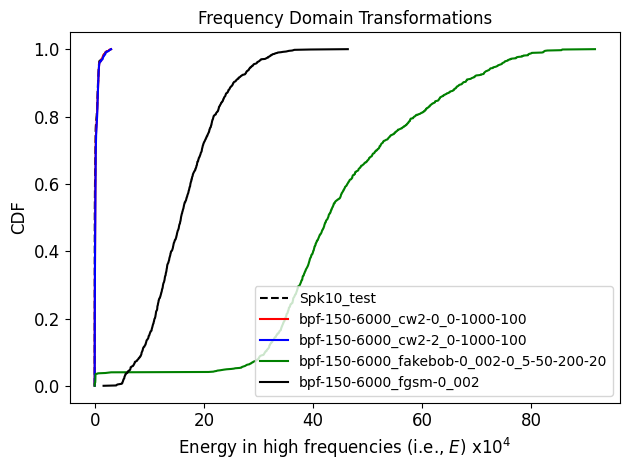

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00002403, STD =  0.00003873, D =  0.00014022
------------------------------------------
FNR for ds-0_45_cw2-0_0-1000-100: 97.2
------------------------------------------
Size = 1000, Max = 0.00030118649010546505, Min = 7.919874889239509e-08, Mean =  0.00002524, STD =  0.00003943, D =  0.00014355
------------------------------------------
FNR for ds-0_45_cw2-2_0-1000-100: 96.89999999999999
------------------------------------------
Size = 1000, Max = 0.009151839651167393, Min = 0.0, Mean =  0.00437715, STD =  0.00111953, D =  0.00773575
------------------------------------------
FNR for ds-0_45_fakebob-0_002-0_5-50-200-20: 0.3
------------------------------------------
Size = 1000, Max = 0.0038355961441993713, Min = 0.00010122662934008986, Mean =  0.00163354, STD =  0.00083244, D =  0.00413085
-----------------------

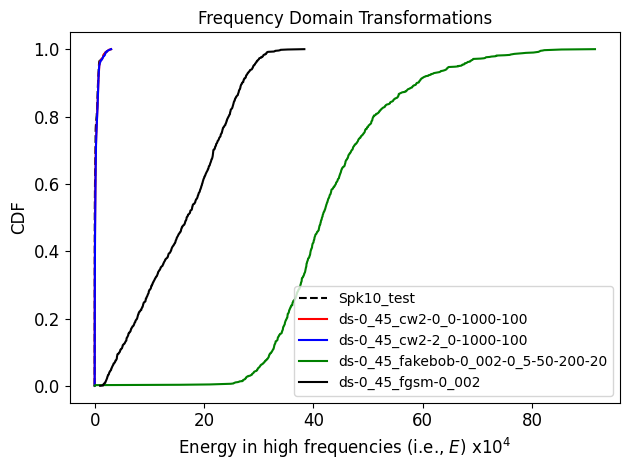

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00002404, STD =  0.00003783, D =  0.00013753
------------------------------------------
FNR for lpf-4500_cw2-0_0-1000-100: 97.0
------------------------------------------
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00002571, STD =  0.00003875, D =  0.00014195
------------------------------------------
FNR for lpf-4500_cw2-2_0-1000-100: 97.0
------------------------------------------
Size = 1000, Max = 0.009703176096081734, Min = 0.0, Mean =  0.00425316, STD =  0.00113721, D =  0.00766479
------------------------------------------
FNR for lpf-4500_fakebob-0_002-0_5-50-200-20: 0.7000000000000001
------------------------------------------


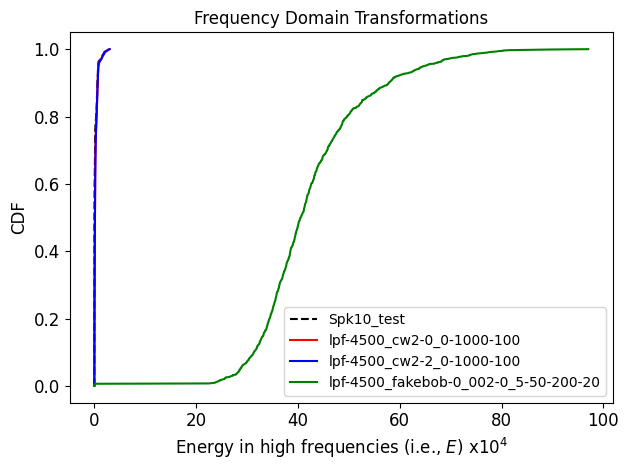

In [85]:
# Defense - Frequency Domain
freq_d_files = os.listdir("output/defense/frequency")
try:
  freq_d_files.remove(".ipynb_checkpoints")
except:
  pass
for f in freq_d_files:
  files = os.listdir(f"output/defense/frequency/{f}")
  freq_d_data = {}
  for x in files:
    with open(f"output/defense/frequency/{f}/{x}", "br") as f1:
      temp = pickle.load(f1)
      temp.sort()
      freq_d_data[x.split(".pickle")[0]] = temp
  plot_cdf_adversarial_audio(original_data["spk10test"], freq_d_data, "Frequency Domain Transformations")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.0449744313955307, Min = 0.0, Mean =  0.00215244, STD =  0.00422319, D =  0.01482201
------------------------------------------
FNR for aac-c-15000_cw2-0_0-1000-100: 33.900000000000006
------------------------------------------
Size = 1000, Max = 0.04698876291513443, Min = 0.0, Mean =  0.00241172, STD =  0.00446974, D =  0.01582095
------------------------------------------
FNR for aac-c-15000_cw2-1_0-1000-100: 30.099999999999998
------------------------------------------
Size = 1000, Max = 0.05834152549505234, Min = 0.0, Mean =  0.00286403, STD =  0.00526360, D =  0.01865483
------------------------------------------
FNR for aac-c-15000_cw2-2_0-1000-100: 25.0
------------------------------------------
Size = 1000, Max = 32.94425582885742, Min = 0.00046494658454321325, Mean =  0.78867739, STD =  3.03044581, D =  9.88001484
------------------------------------

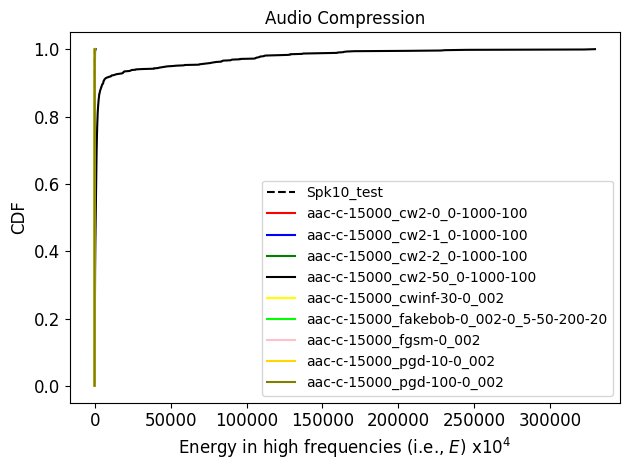

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.00048778552445583045, Min = 1.4846419560399227e-07, Mean =  0.00004967, STD =  0.00006629, D =  0.00024854
------------------------------------------
FNR for aac-v-1_cw2-0_0-1000-100: 92.10000000000001
------------------------------------------
Size = 1000, Max = 0.008307132869958878, Min = 0.0017750727711245418, Mean =  0.00418231, STD =  0.00087472, D =  0.00680646
------------------------------------------
FNR for aac-v-1_fakebob-0_002-0_5-50-200-20: 0.0
------------------------------------------
Size = 1000, Max = 0.005297178402543068, Min = 0.0002658064477145672, Mean =  0.00258042, STD =  0.00093175, D =  0.00537568
------------------------------------------
FNR for aac-v-1_fgsm-0_002: 0.0
------------------------------------------
Size = 1000, Max = 0.0018404622096568346, Min = 0.00023533235071226954, Mean =  0.00075302, STD =  0.00023272, D =  0.0014

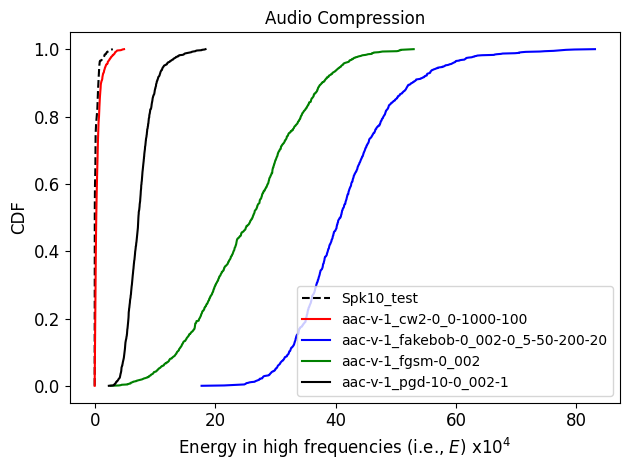

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 8.921618461608887, Min = 1.8119226297130808e-07, Mean =  0.12394271, STD =  0.72807080, D =  2.30815510
------------------------------------------
FNR for amr-6600_cw2-0_0-1000-100: 14.6
------------------------------------------
Size = 1000, Max = 0.0038219094276428223, Min = 0.0, Mean =  0.00063856, STD =  0.00091119, D =  0.00337214
------------------------------------------
FNR for amr-6600_cwinf-30-0_002: 64.60000000000001
------------------------------------------
Size = 1000, Max = 0.00707562081515789, Min = 0.00024079732247628272, Mean =  0.00324418, STD =  0.00116052, D =  0.00672575
------------------------------------------
FNR for amr-6600_fgsm-0_002: 0.0
------------------------------------------
Size = 1000, Max = 0.002740161959081888, Min = 0.0, Mean =  0.00038244, STD =  0.00063844, D =  0.00229776
------------------------------------------
FNR

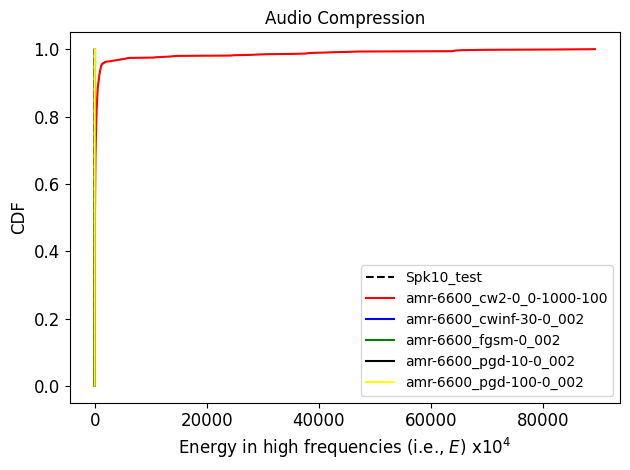

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.03479413688182831, Min = 0.0, Mean =  0.00116197, STD =  0.00274669, D =  0.00940205
------------------------------------------
FNR for mp3-c-24000_cw2-0_0-1000-100: 40.1
------------------------------------------
Size = 1000, Max = 0.06272586435079575, Min = 0.0, Mean =  0.00151294, STD =  0.00358295, D =  0.01226178
------------------------------------------
FNR for mp3-c-24000_cw2-2_0-1000-100: 32.2
------------------------------------------
Size = 1000, Max = 0.0056892018765211105, Min = 0.0, Mean =  0.00264277, STD =  0.00082004, D =  0.00510288
------------------------------------------
FNR for mp3-c-24000_cwinf-30-0_002-1: 1.9
------------------------------------------
Size = 1000, Max = 0.009468048810958862, Min = 9.73789951785875e-07, Mean =  0.00482049, STD =  0.00101856, D =  0.00787618
------------------------------------------
FNR for mp3-c-2400

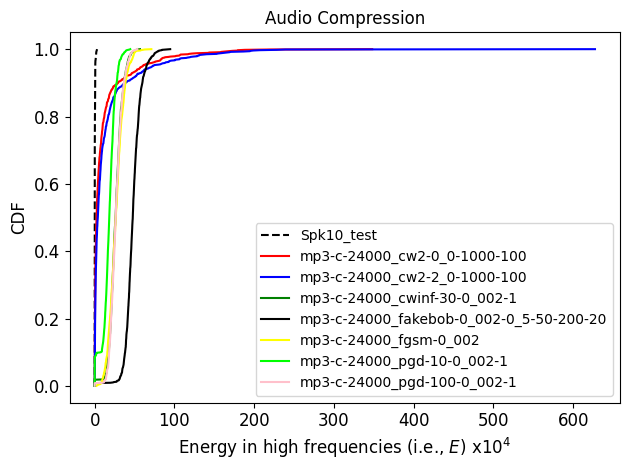

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.0009760113898664713, Min = 2.0194049454858032e-07, Mean =  0.00004683, STD =  0.00006845, D =  0.00025218
------------------------------------------
FNR for mp3-v-4_cw2-0_0-1000-100: 92.80000000000001
------------------------------------------
Size = 1000, Max = 0.008165218867361546, Min = 0.0020883968099951744, Mean =  0.00420590, STD =  0.00086001, D =  0.00678593
------------------------------------------
FNR for mp3-v-4_fakebob-0_002-0_5-50-200-20: 0.0
------------------------------------------
Size = 1000, Max = 0.0053488570265471935, Min = 0.00034569756826385856, Mean =  0.00264517, STD =  0.00095772, D =  0.00551834
------------------------------------------
FNR for mp3-v-4_fgsm-0_002: 0.0
------------------------------------------
Size = 1000, Max = 0.002202744362875819, Min = 0.00034288549795746803, Mean =  0.00093760, STD =  0.00022978, D =  0.0016

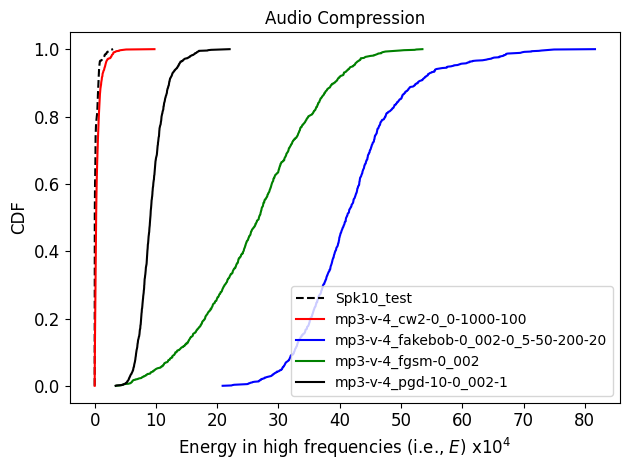

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 61.40201187133789, Min = 0.0, Mean =  0.58544302, STD =  2.49030972, D =  8.05637217
------------------------------------------
FNR for opus-8000_cw2-0_0-1000-100: 18.6
------------------------------------------
Size = 1000, Max = 47.709938049316406, Min = 0.0, Mean =  0.90478343, STD =  2.79219317, D =  9.28136295
------------------------------------------
FNR for opus-8000_cw2-2_0-1000-100: 14.000000000000002
------------------------------------------
Size = 1000, Max = 0.0032102675177156925, Min = 0.0, Mean =  0.00026288, STD =  0.00065100, D =  0.00221588
------------------------------------------
FNR for opus-8000_cwinf-30-0_002: 84.6
------------------------------------------
Size = 1000, Max = 0.008412808179855347, Min = 0.0, Mean =  0.00481763, STD =  0.00103765, D =  0.00793060
------------------------------------------
FNR for opus-8000_fakebob-0_002

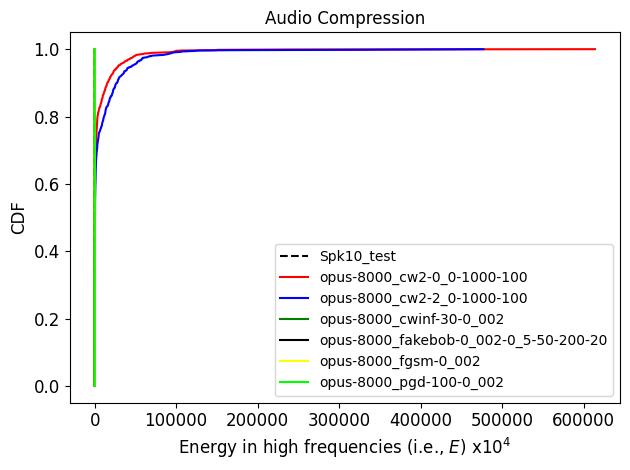

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 3.9852066040039062, Min = 7.919874889239509e-08, Mean =  0.05149664, STD =  0.20930415, D =  0.67940910
------------------------------------------
FNR for speex-11000_cw2-0_0-1000-100: 15.0
------------------------------------------
Size = 1000, Max = 0.0023794127628207207, Min = 0.0, Mean =  0.00036232, STD =  0.00062830, D =  0.00224723
------------------------------------------
FNR for speex-11000_cwinf-30-0_002: 74.0
------------------------------------------
Size = 1000, Max = 0.008755196817219257, Min = 0.0, Mean =  0.00494651, STD =  0.00087601, D =  0.00757454
------------------------------------------
FNR for speex-11000_fakebob-0_002-0_5-50-200-20: 0.8
------------------------------------------
Size = 1000, Max = 0.005487931426614523, Min = 0.00030104260076768696, Mean =  0.00278064, STD =  0.00088372, D =  0.00543180
--------------------------------

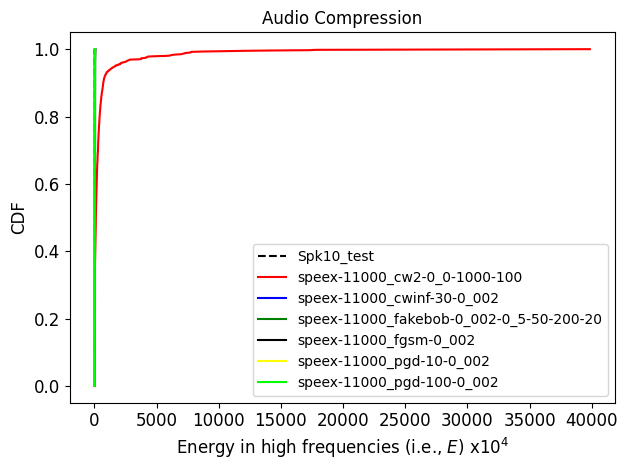

In [86]:
# Defense - Compression
comp_d_files = os.listdir("output/defense/compression")
try:
  comp_d_files.remove(".ipynb_checkpoints")
except:
  pass
for f in comp_d_files:
  files = os.listdir(f"output/defense/compression/{f}")
  comp_d_data = {}
  for x in files:
    with open(f"output/defense/compression/{f}/{x}", "br") as f1:
      temp = pickle.load(f1)
      temp.sort()
      comp_d_data[x.split(".pickle")[0]] = temp
  plot_cdf_adversarial_audio(original_data["spk10test"], comp_d_data, "Audio Compression")

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 0.0036605284549295902, Min = 0.0, Mean =  0.00006534, STD =  0.00019114, D =  0.00063877
------------------------------------------
FNR for feco-ok-kmeans-raw-0_2-L2_cw2-0_0-1000-100: 88.1
------------------------------------------
Size = 1000, Max = 0.005806514993309975, Min = 0.0, Mean =  0.00009457, STD =  0.00029725, D =  0.00098632
------------------------------------------
FNR for feco-ok-kmeans-raw-0_2-L2_cw2-2_0-1000-100: 84.8
------------------------------------------
Size = 1000, Max = 0.11410157382488251, Min = 1.4618624845752493e-05, Mean =  0.01167915, STD =  0.01037681, D =  0.04280958
------------------------------------------
FNR for feco-ok-kmeans-raw-0_2-L2_cw2-50_0-1000-100: 2.0
------------------------------------------
Size = 1000, Max = 0.0030658836476504803, Min = 0.00038120095268823206, Mean =  0.00100813, STD =  0.00036001, D =  0.0020

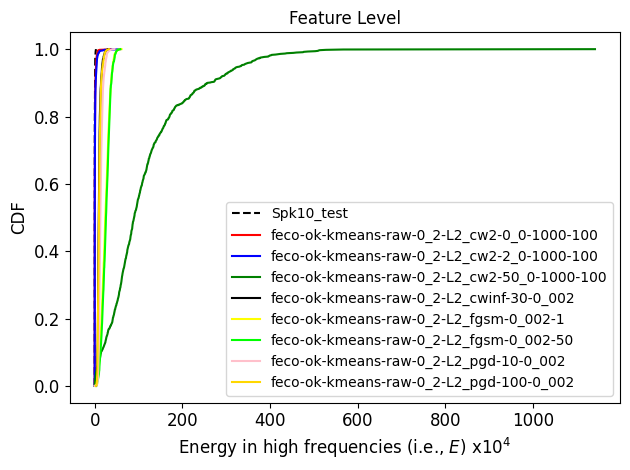

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 1000, Max = 9366550.0, Min = 558073.375, Mean =  3185506.75000000, STD =  1101941.75000000, D =  6491332.00000000
------------------------------------------
FNR for replicate-attack_pgd_100_0.002: 0.0
------------------------------------------


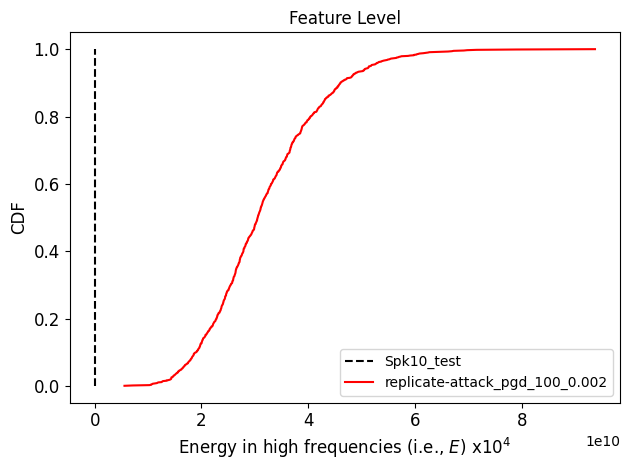

In [87]:
# Defense - Feature Level
feature_d_files = os.listdir("output/defense/feature")
try:
  feature_d_files.remove(".ipynb_checkpoints")
except:
  pass
for f in feature_d_files:
  files = os.listdir(f"output/defense/feature/{f}")
  feature_d_data = {}
  for x in files:
    with open(f"output/defense/feature/{f}/{x}", "br") as f1:
      temp = pickle.load(f1)
      temp.sort()
      feature_d_data[x.split(".pickle")[0]] = temp
  plot_cdf_adversarial_audio(original_data["spk10test"], feature_d_data, "Feature Level")